In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.datasets import load_breast_cancer # data set load krne ke liye
from sklearn.model_selection import train_test_split # model to train krne ke liye
from sklearn.preprocessing import StandardScaler # Data ko ek hi scale par laana
from sklearn.linear_model import LogisticRegression # Yeh ek seedhi line (boundary) kheencha hai.
from sklearn.tree import DecisionTreeClassifier # Yeh Flowchart ki tarah sawal poochta hai (e.g. Kya cell size 5 se bada hai? Haan -> Cancer).
from sklearn.ensemble import RandomForestClassifier # Yeh bahut saare Decision Trees ka group ha
from sklearn.neighbors import KNeighborsClassifier # Yeh dekhta hai ki naye patient ka data purane kis patient se milta-julta hai.
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report# ye train kiye gaye models ke accuracy score batata hai model kitna sahi work kr raha hai


In [ ]:
# Data set
data = load_breast_cancer()
X = data.data  # Medical features
y = data.target

In [ ]:
# 3. Training aur test split banana data ke liye
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Feature Scaling karna jo KNN ke liye bahut zaroori hai
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Models ko load or fit krna
# 5. Models ko initialize karna
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:

# # 5. Loop chalakar har Model ko Test karna aur Graph dikhana
# plt.figure(figsize=(10, 8)) # Graphs ka size set karna

for i, (name, model) in enumerate(models.items(), 1):
    # Model Training
    model.fit(X_train, y_train)

    # Prediction
    predictions = model.predict(X_test)

    # Performance nikalna
    acc = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    print(f"Model: {name} | Accuracy: {acc:.2%}")

Model: Logistic Regression | Accuracy: 97.37%
Model: Decision Tree | Accuracy: 93.86%
Model: Random Forest | Accuracy: 96.49%
Model: KNN | Accuracy: 94.74%


In [ ]:
# 6. Confusion Matrix ka Graph banana
    plt.subplot(2, 2, i) # Ek hi screen par 4 graphs dikhane ke liye
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name}\nAccuracy: {acc:.2%}")
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')



IndentationError: unexpected indent (ipython-input-1058992236.py, line 2)

In [ ]:
# 7. Final Detailed Report
for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\nDetailed Report for {name}:")
    print(classification_report(y_test, preds))



Detailed Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Detailed Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Detailed Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg  

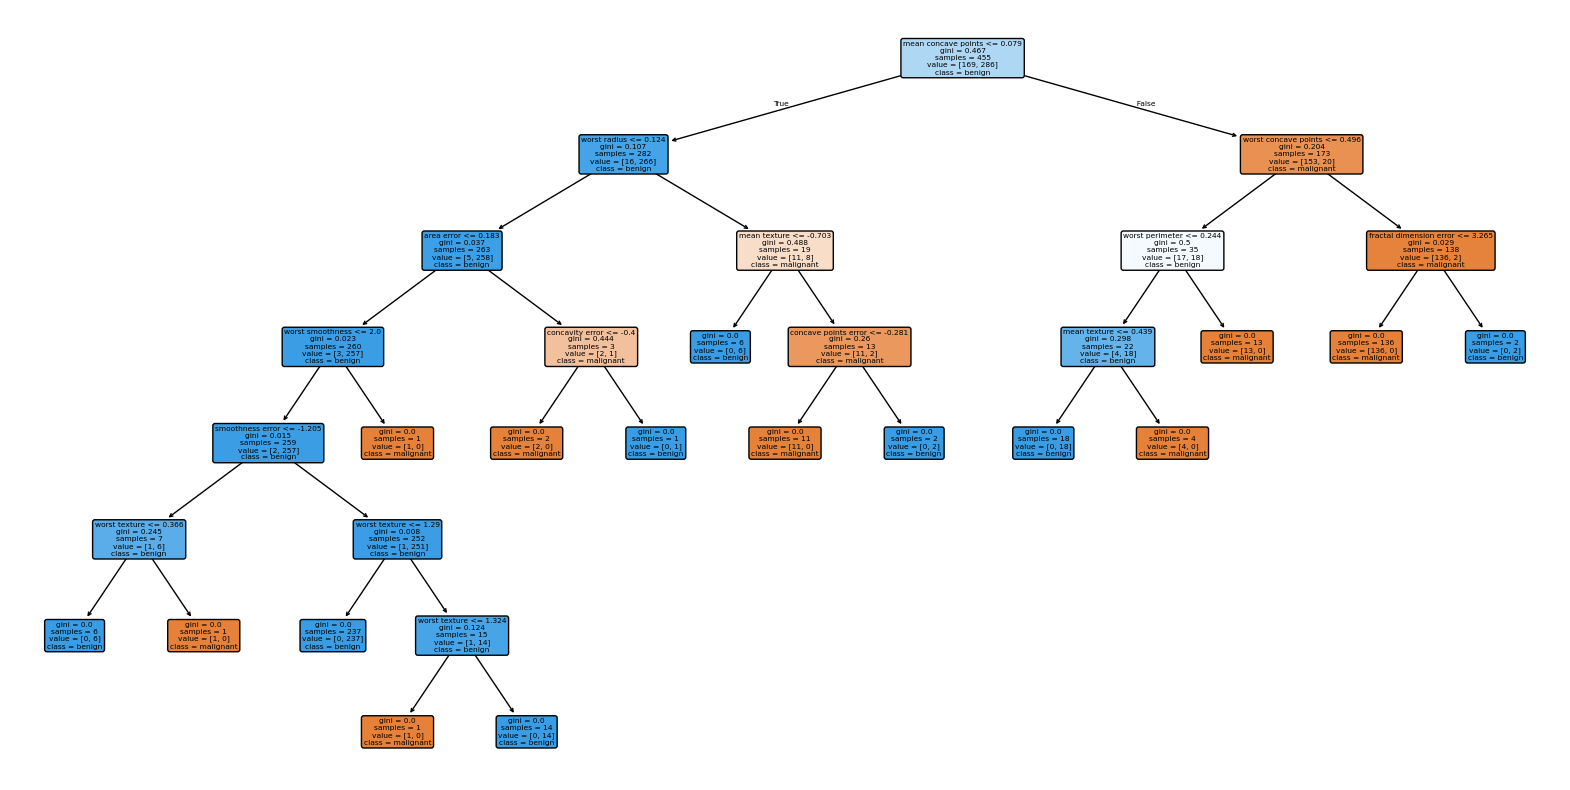

In [ ]:
plt.figure(figsize=(20, 10))

plot_tree(
    dt,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True
)

plt.show()
